In [1]:
# THIS NOTEBOOK TRAINS THE FIRST RNN LSTM OF THE PROJECT ON THE 28by28 DATASET

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
from data_loader import DataLoader
from utils.visualize import show_images_in_grid, show_images_as_video, show_reconstructions, compare_images_as_video
from cnn import Autoencoder
from rnn import Seq2Seq
import random

Using TensorFlow backend.
/home/abhi/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/abhi/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/abhi/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/abhi/anaconda3

In [4]:
root = os.getcwd()
rnn_train_dir = root+"/../datasets/training_set/data/rnn.npy"
rnn_test_dir = root+"/../datasets/test_set/data/rnn.npy"

In [5]:
# WE WON'T USE THE TEST DATA AT ALL AND INSTEAD SPLIT THE TRAIN DATA INTO TRAIN, TEST, AND VALIDATION DATASETS WITH THE DATA LOADER

In [6]:
rnn_data_loader = DataLoader(features_dir=rnn_train_dir, labels_dir=rnn_train_dir)

In [7]:
rnn_data_loader.split_train_val_test(train=0.7, val=0.2, test=0.1)

In [8]:
# NORMALIZE ALL PIXEL VALUES FROM 0-255 TO O-1

In [9]:
rnn_data_loader.preprocess(rescale=True)

In [6]:
ae = Autoencoder()
ae.build_model(input_dim=(28, 28, 3), latent_dim=(64,))
ae.set_weights(root+"/../models/autoencoder.h5")

Instructions for updating:
Colocations handled automatically by placer.


In [154]:
np.save(root+"/X_train.npy", rnn_data_loader.X_train)
np.save(root+"/X_val.npy", rnn_data_loader.X_val)
np.save(root+"/X_test.npy", rnn_data_loader.X_test)

In [7]:
X_train = np.load(root+"/X_train.npy")
X_val = np.load(root+"/X_val.npy")
X_test = np.load(root+"/X_test.npy")

In [8]:
X_train = ae.encode_series(rnn_data_loader.X_train)
X_val = ae.encode_series(rnn_data_loader.X_val)
X_test = ae.encode_series(rnn_data_loader.X_test)

NameError: name 'rnn_data_loader' is not defined

In [9]:
X_train = ae.encode_series(X_train)
X_val = ae.encode_series(X_val)
X_test = ae.encode_series(X_test)

In [11]:
X_train.shape

(84, 105, 64)

In [12]:
seq = Seq2Seq()
seq.build_model(input_length=20, input_dim=64, latent_dim=(256,), output_length=30, output_dim=64)

In [13]:
seq.set_weights(root+"/../models/seq2seqv2.h5")

In [14]:
seq.encoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 20, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 1024)          4460544   
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 512)           3147776   
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               787456    
Total params: 8,395,776
Trainable params: 8,395,776
Non-trainable params: 0
_________________________________________________________________


In [15]:
seq.decoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 256)               0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 30, 256)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 512)           1574912   
_________________________________________________________________
lstm_5 (LSTM)                (None, 30, 1024)          6295552   
_________________________________________________________________
time_distributed_1 (TimeDist (None, 30, 64)            65600     
Total params: 7,936,064
Trainable params: 7,936,064
Non-trainable params: 0
_________________________________________________________________


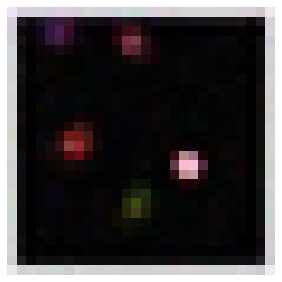

EPOCH 501
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 29.3859 - val_loss: 278.7001
EPOCH 502
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 29.2669 - val_loss: 278.6603
EPOCH 503
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 29.2919 - val_loss: 278.3437
EPOCH 504
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 29.2825 - val_loss: 279.1447
EPOCH 505
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 29.1369 - val_loss: 279.1194
EPOCH 506
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 29.1399 - val_loss: 279.4864
EPOCH 507
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [=====

84/84 [==============================] - 0s 3ms/step - loss: 28.0759 - val_loss: 280.3716
EPOCH 555
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 27.9479 - val_loss: 279.8548
EPOCH 556
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 27.9405 - val_loss: 280.8539
EPOCH 557
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 27.9403 - val_loss: 279.9137
EPOCH 558
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 27.8837 - val_loss: 280.6854
EPOCH 559
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 27.8913 - val_loss: 279.9931
EPOCH 560
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 27.8374 - val_l

84/84 [==============================] - 0s 3ms/step - loss: 25.6527 - val_loss: 282.5431
EPOCH 661
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 25.9670 - val_loss: 283.4059
EPOCH 662
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 25.9966 - val_loss: 282.6638
EPOCH 663
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 26.1840 - val_loss: 283.2907
EPOCH 664
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 26.0364 - val_loss: 282.4744
EPOCH 665
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 26.4181 - val_loss: 283.5836
EPOCH 666
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 26.7659 - val_l

84/84 [==============================] - 0s 3ms/step - loss: 23.5936 - val_loss: 283.1064
EPOCH 767
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 23.5494 - val_loss: 283.2869
EPOCH 768
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 23.4410 - val_loss: 283.0110
EPOCH 769
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 23.3633 - val_loss: 283.2588
EPOCH 770
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 23.3009 - val_loss: 284.1152
EPOCH 771
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 23.2584 - val_loss: 284.0996
EPOCH 772
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 23.2072 - val_l

84/84 [==============================] - 0s 3ms/step - loss: 22.6340 - val_loss: 287.8947
EPOCH 873
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 23.0305 - val_loss: 287.7495
EPOCH 874
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 23.1671 - val_loss: 288.3505
EPOCH 875
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 23.1438 - val_loss: 287.2050
EPOCH 876
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 23.4973 - val_loss: 287.9126
EPOCH 877
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 24.2956 - val_loss: 286.6579
EPOCH 878
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 24.2268 - val_l

84/84 [==============================] - 0s 3ms/step - loss: 20.8914 - val_loss: 290.7238
EPOCH 979
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 20.6920 - val_loss: 291.1154
EPOCH 980
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 20.6574 - val_loss: 291.3409
EPOCH 981
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 20.4619 - val_loss: 291.3882
EPOCH 982
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 20.3402 - val_loss: 291.2771
EPOCH 983
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 20.2225 - val_loss: 290.8221
EPOCH 984
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 3ms/step - loss: 20.1559 - val_l

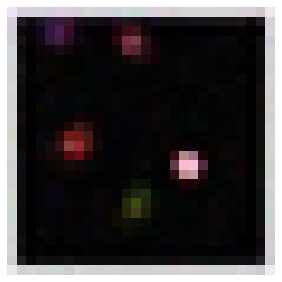

In [74]:
# TRAIN LOOP
for epoch in range(1000):
    print('EPOCH %d' % (epoch))
    seq.train(X_train=X_train[:, :20, :], 
             Y_train=X_train[:, 20:50, :], 
             X_val=X_val[:, :20, :], 
             Y_val=X_val[:, 20:50, :], 
             epochs=1, 
             batch_size=32
             )
    if epoch % 500 == 0:
        i = random.randint(0, X_train.shape[0]-1)
        X, Y = [], []
        x = X_train[i, :20, :]
        X.append(x)
        X = np.array(X)
        y = X_train[i, 20:50, :]
        Y.append(y)
        Y = np.array(Y)
        Y_hat = seq.model.predict(X)
        result = np.concatenate((X, Y_hat), axis=1)
        Y_hat_decoded = ae.decode_series(result)
        show_images_as_video(Y_hat_decoded[0])
    seq.save_weights(root+"/../models/seq2seqv3.h5")

In [16]:
def produce_videos(train=True, val=False, test=False):
    i = 0
    if train:
        i = random.randint(0, X_train.shape[0]-1)
    elif val:
        i = random.randint(0, X_val.shape[0]-1)
    elif test:
        i = random.randint(0, X_test.shape[0]-1)
    X, Y = [], []
    x, y = None, None
    if train:
        x = X_train[i, :20, :]
        y = X_train[i, 20:50, :]
    elif val:
        x = X_val[i, :20, :]
        y = X_val[i, 20:50, :]
    elif test:
        x = X_test[i, :20, :]
        y = X_test[i, 20:50, :]
    X.append(x)
    X = np.array(X)
    Y.append(y)
    Y = np.array(Y)
    Y_hat = seq.model.predict(X)
    result = np.concatenate((X, Y_hat), axis=1)
    Y_hat_decoded = ae.decode_series(result)
    result = np.concatenate((X, Y), axis=1)
    Y_decoded = ae.decode_series(result)
    return Y_decoded[0], Y_hat_decoded[0]

In [19]:
Y, Y_hat = produce_videos(test=True)

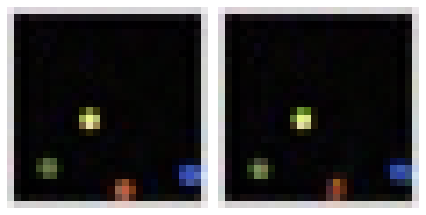

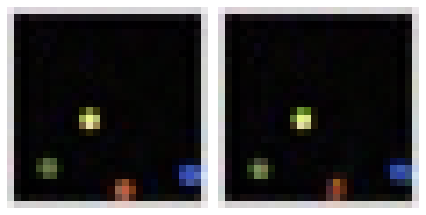

In [25]:
compare_images_as_video(Y, Y_hat)

In [ ]:
Y, Y_hat = produce_videos(test=True)

In [ ]:
compare_images_as_video(Y, Y_hat)

In [191]:
def produce_long_videos(train=True, val=False, test=False):
    i = 0
    if train:
        i = random.randint(0, X_train.shape[0]-1)
    elif val:
        i = random.randint(0, X_val.shape[0]-1)
    elif test:
        i = random.randint(0, X_test.shape[0]-1)
    X, Y = [], []
    x, y = None, None
    if train:
        x = X_train[i, :20, :]
        y = X_train[i, 20:50, :]
    elif val:
        x = X_val[i, :20, :]
        y = X_val[i, 20:50, :]
    elif test:
        x = X_test[i, :20, :]
        y = X_test[i, 20:50, :]
    X.append(x)
    X = np.array(X)
    Y_hat = seq.model.predict(X)
    result = np.concatenate((X, Y_hat), axis=1)
    for j in range(1):
        X_in = result[:, -20:, :]
        Y_hat_out = seq.model.predict(X_in)
        result = np.concatenate((result, Y_hat_out), axis=1)    
    print(result.shape)
    Y_hat_decoded = ae.decode_series(result)
    if train:
        y = X_train[i, :result.shape[1], :]
    elif val:
        y = X_val[i, :result.shape[1], :]
    elif test:
        y = X_test[i, :result.shape[1], :]
    Y.append(y)
    Y = np.array(Y)    
    Y_decoded = ae.decode_series(Y)
    return Y_decoded[0], Y_hat_decoded[0]

In [197]:
Y_long, Y_hat_long = produce_long_videos(test=True)

(1, 80, 64)


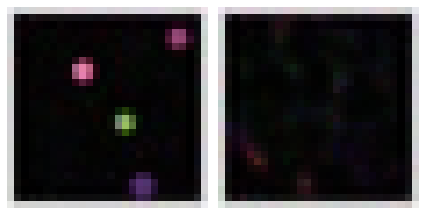

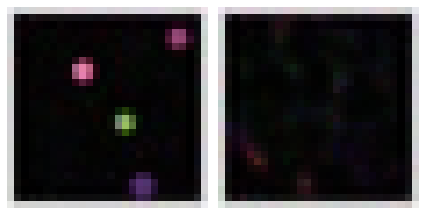

In [209]:
compare_images_as_video(Y_long, Y_hat_long)